In [35]:
"""
Jupyter notebook for 02456 Deep Learning Project 11 with Augmented Hearing.
Provided by Louis Lech Nissen (s140942), Simon Yamazaki Jensen (s174165) & Victor R. Holm (s144765)

Please change path to folder containing 02456JN.ipynb (this script) and have transcripts-folder in same path. 
Path_example is given for illustration purposes and does not need to be included in script.

Remember to unzip the transcripts.zip-folder.


"""

'\nJupyter notebook for 02456\n\nJupyter Notebook for Project 11 with Augmented Hearing.\n\nPlease change path to folder containing .txt-files (transcripts) of the Github. \nPath_example is given for illustration purposes and does not need to be included in script.\n\nRemember to unzip the transcripts.zip.\n\n\n'

p-value:
0.022636290083095634


Environments:
0.1677434096286771
\Google_Background_talk
0.03145970598101564
\Google_Canteen
0.022423938962752993
\Google_CarNoise
0.03674461616184531
\Google_PartyNoise
0.2011977857032725
\wav2vec_Background_talk
0.04653566122222174
\wav2vec_Canteen
0.03834769376845395
\wav2vec_CarNoise
0.07759858840512923
\wav2vec_PartyNoise


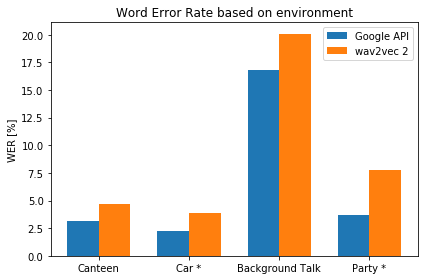

Accents:
0.12571706195692145
\Google_Greek
0.1177175275558017
\Google_Jap
0.3105975738779698
\Google_vietnam
0.05859759177500218
\wav2vec_Greek
0.10467823046325109
\wav2vec_Jap
0.1451651865632294
\wav2vec_vietnam


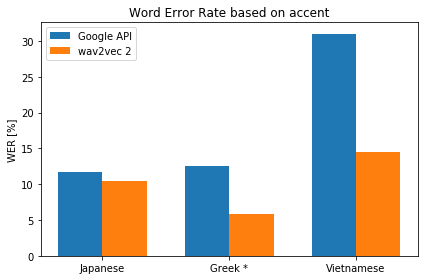

White Noise:


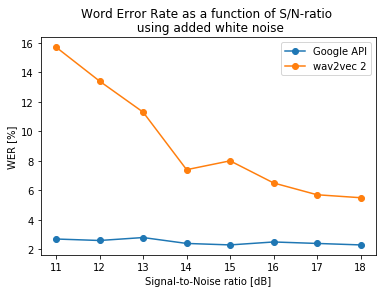

In [2]:
import jiwer 
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import os



path = '/path/to/02456JN.ipynb'
os.chdir(path)
#path_Example = '/Users/Louis Lech Nissen/Documents/DTU/5. Semester/02456 Deep Learning/Project'



                                    ############# STATISTICS ##############

WERs1 = []
WERs2 = []

    
##### CREATE VECTOR WITH GROUND TRUTH #####
fileName = "transcripts/Truth_splits.txt"
in_file = open(fileName, 'r')
file = in_file.readlines()

inp_list = file
out_str = " "
out_str = out_str.join(inp_list)

GT = out_str.split("//")

while '' in GT:
    GT.remove('')
    

######  CREATE VECTOR WITH HYPOTHESIS ######

fileName1 = "transcripts/Google_clean_splits.txt"
in_file1 = open(fileName1, 'r')
file1 = in_file1.readlines()

inp_list1 = file1
out_str1 = " "
out_str1 = out_str1.join(inp_list1)


Hypo1 = out_str1.split("//")

while '' in Hypo1:
    Hypo1.remove('')
    

fileName2 = "transcripts/wav2vec_clean_splits.txt"
in_file2 = open(fileName2, 'r')
file2 = in_file2.readlines()

inp_list2 = file2
out_str2 = " "
out_str2 = out_str2.join(inp_list2)


Hypo2 = out_str2.split("//")

while '' in Hypo2:
    Hypo2.remove('')


###### WORD ERROR RATE #####

# Make all letters lower case + remove multiple spaces + punctuation
PreP = jiwer.Compose([jiwer.ToLowerCase(),jiwer.RemoveMultipleSpaces(),jiwer.RemovePunctuation(),jiwer.RemoveEmptyStrings(), jiwer.RemoveWhiteSpace(replace_by_space=True)])
#
ii = 0


while ii < len(GT):
    WER1 = jiwer.wer(GT[ii], Hypo1[ii], PreP, PreP)
    ii = ii+1
    
    WERs1.append(WER1 * 100)

ii = 0

while ii < len(GT):
    WER2 = jiwer.wer(GT[ii], Hypo2[ii], PreP, PreP)
    ii = ii+1
    
    WERs2.append(WER2 * 100)

tstat, p = stats.ttest_ind(WERs1,WERs2,equal_var = False)

#print(tstat)
print('p-value:')
print(p)
print('\n')

                                        ############# ENVIRONMENTS ##############
print('Environments:')
#INITIALIZATION
WER = []
WER_all_Canteen = []
WER_all_CarNoise = []
WER_all_PartyNoise = []
WER_all_BT = []


##### PRE-PROCESSING FOR JIWER-FUNCTION #####

# Make all letters lower case + remove multiple spaces + punctuation
PreP = jiwer.Compose([jiwer.ToLowerCase(),jiwer.RemoveMultipleSpaces(),jiwer.RemovePunctuation(),jiwer.RemoveEmptyStrings(),jiwer.RemoveWhiteSpace(replace_by_space=True)])





##### GROUND TRUTH #####
fileName = "transcripts/Truth_splits.txt"
in_file = open(fileName, 'r')
file = in_file.readlines()

inp_list = file
out_str = " "
out_str = out_str.join(inp_list)

GT = out_str.split("//")

#Remove empty strings
while '' in GT:
    GT.remove('')  
       
        
#Read the environment files and calculate WERs for each
for name in glob(path + '/transcripts/*'): 
    
        
    if 'Canteen_splits.txt' in name:
        
        ##### INITIALIZATION ######
        WER_Canteen = []
        WERs_Canteen = []
        ii = 0
       
        
        in_file2 = open(name, 'r')
        file2 = in_file2.readlines()
        
        inp_list2 = file2
        out_str2 = " "
        out_str2 = out_str2.join(inp_list2)
        
        Hypo2 = out_str2.split('//')

        
        while '' in Hypo2:
            Hypo2.remove('')
        
        
        ##### WORD ERROR RATE #####
        while ii < len(GT):
            WER_Canteen = np.array(jiwer.wer(GT[ii], Hypo2[ii], PreP, PreP))

            ii = ii+1
                        
            WERs_Canteen = np.append(WERs_Canteen, WER_Canteen)
            
        WERm_Canteen = np.mean(WERs_Canteen) 
        
        WER_all_Canteen = np.append(WER_all_Canteen, WERm_Canteen)
        print(WER_all_Canteen[-1])

        ##### NAMING #####
        name = name.split('/transcripts')[1]
        name = name.split('_splits')[0]
        print(name)
    
    if 'CarNoise_splits.txt' in name:
        
        ##### INITIALIZATION ######
        WER_CarNoise = []
        WERs_CarNoise = []
        ii = 0
       
        
        in_file2 = open(name, 'r')
        file2 = in_file2.readlines()
        
        inp_list2 = file2
        out_str2 = " "
        out_str2 = out_str2.join(inp_list2)
        
        Hypo2 = out_str2.split('//')

        
        while '' in Hypo2:
            Hypo2.remove('')
        
        
        ##### WORD ERROR RATE #####
        while ii < len(GT):
            WER_CarNoise = np.array(jiwer.wer(GT[ii], Hypo2[ii], PreP, PreP))

            ii = ii+1
                        
            WERs_CarNoise = np.append(WERs_CarNoise, WER_CarNoise)
            
        WERm_CarNoise = np.mean(WERs_CarNoise) 
        
        WER_all_CarNoise = np.append(WER_all_CarNoise, WERm_CarNoise)
        print(WER_all_CarNoise[-1])

        ##### NAMING #####
        name = name.split('/transcripts')[1]
        name = name.split('_splits')[0]
        print(name)
        
    if 'PartyNoise_splits.txt' in name:
        
        ##### INITIALIZATION ######
        WER_PartyNoise = []
        WERs_PartyNoise = []
        ii = 0
       
        
        in_file2 = open(name, 'r')
        file2 = in_file2.readlines()
        
        inp_list2 = file2
        out_str2 = " "
        out_str2 = out_str2.join(inp_list2)
        
        Hypo2 = out_str2.split('//')

        
        while '' in Hypo2:
            Hypo2.remove('')
        
        
        ##### WORD ERROR RATE #####
        while ii < len(GT):
            WER_PartyNoise = np.array(jiwer.wer(GT[ii], Hypo2[ii], PreP, PreP))

            ii = ii+1
                        
            WERs_PartyNoise = np.append(WERs_PartyNoise, WER_PartyNoise)
            
        WERm_PartyNoise = np.mean(WERs_PartyNoise)
        
        WER_all_PartyNoise = np.append(WER_all_PartyNoise, WERm_PartyNoise)
        print(WER_all_PartyNoise[-1])

        ##### NAMING #####
        name = name.split('/transcripts')[1]
        name = name.split('_splits')[0]
        print(name)


    if 'Background_talk_splits.txt' in name:
        
        ##### INITIALIZATION ######
        WER_BT = []
        WERs_BT = []
        ii = 0
       
        
        in_file2 = open(name, 'r')
        file2 = in_file2.readlines()
        
        inp_list2 = file2
        out_str2 = " "
        out_str2 = out_str2.join(inp_list2)
        
        Hypo2 = out_str2.split('//')

        
        while '' in Hypo2:
            Hypo2.remove('')
        
        
        ##### WORD ERROR RATE #####
        while ii < len(GT):
            WER_BT = np.array(jiwer.wer(GT[ii], Hypo2[ii], PreP, PreP))

            ii = ii+1
                        
            WERs_BT = np.append(WERs_BT, WER_BT)
            
        WERm_BT = np.mean(WERs_BT)
        
        WER_all_BT = np.append(WER_all_BT, WERm_BT)
        print(WER_all_BT[-1])

        ##### NAMING #####
        name = name.split('/transcripts')[1]
        name = name.split('_splits')[0]
        print(name)

#PLOT
labels = ['Canteen', 'Car *', 'Background Talk', 'Party *']

x = np.arange(len(labels))  
width = 0.35  # the width of the bars

Googlec = [WER_all_Canteen[0] * 100, WER_all_CarNoise[0] * 100, WER_all_BT[0] * 100, WER_all_PartyNoise[0] * 100]
Wav2vecc = [WER_all_Canteen[1] * 100, WER_all_CarNoise[1] * 100, WER_all_BT[1] * 100, WER_all_PartyNoise[1] * 100]

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Googlec, width, label='Google API')
rects2 = ax.bar(x + width/2, Wav2vecc, width, label='wav2vec 2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('WER [%]')
ax.set_title('Word Error Rate based on environment')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()



                                        ############# ACCENTS ##############

print('Accents:')
#INITIALIZATION
WER = []
WER_all_greek = []
WER_all_jap = []
WER_all_viet = []

##### PRE-PROCESSING FOR JIWER-FUNCTION #####

# Make all letters lower case + remove multiple spaces + punctuation
PreP = jiwer.Compose([jiwer.ToLowerCase(),jiwer.RemoveMultipleSpaces(),jiwer.RemovePunctuation(),jiwer.RemoveEmptyStrings(),jiwer.RemoveWhiteSpace(replace_by_space=True)])





##### GROUND TRUTH #####
fileName = "transcripts/Truth_half_splits.txt"
in_file = open(fileName, 'r')
file = in_file.readlines()

inp_list = file
out_str = " "
out_str = out_str.join(inp_list)

GT = out_str.split("//")

#Remove empty strings
while '' in GT:
    GT.remove('')  
       
        
#Read the accent files and calculate WERs for each
for name in glob(path + '/transcripts/*'): 

        
    if 'Greek_half_splits.txt' in name:
        
        ##### INITIALIZATION ######
        WER_greek = []
        WERs_greek = []
        ii = 0
       
        
        in_file2 = open(name, 'r')
        file2 = in_file2.readlines()
        
        inp_list2 = file2
        out_str2 = " "
        out_str2 = out_str2.join(inp_list2)
        
        Hypo2 = out_str2.split('//')

        
        while '' in Hypo2:
            Hypo2.remove('')
        
        
        ##### WORD ERROR RATE #####
        while ii < len(GT):
            WER_greek = np.array(jiwer.wer(GT[ii], Hypo2[ii], PreP, PreP))

            ii = ii+1
                        
            WERs_greek = np.append(WERs_greek, WER_greek)
            
        WERm_greek = np.mean(WERs_greek)
        
        WER_all_greek = np.append(WER_all_greek, WERm_greek)
        print(WER_all_greek[-1])

        ##### NAMING #####
        name = name.split('/transcripts')[1]
        name = name.split('_half')[0]
        print(name)
    
    if 'Jap_half_splits.txt' in name:
        
        ##### INITIALIZATION ######
        WER_jap = []
        WERs_jap = []
        ii = 0
       
        
        in_file2 = open(name, 'r')
        file2 = in_file2.readlines()
        
        inp_list2 = file2
        out_str2 = " "
        out_str2 = out_str2.join(inp_list2)
        
        Hypo2 = out_str2.split('//')

        
        while '' in Hypo2:
            Hypo2.remove('')
        
        
        ##### WORD ERROR RATE #####
        while ii < len(GT):
            WER_jap = np.array(jiwer.wer(GT[ii], Hypo2[ii], PreP, PreP))

            ii = ii+1
                        
            WERs_jap = np.append(WERs_jap, WER_jap)
            
        WERm_jap = np.mean(WERs_jap) 
        
        WER_all_jap = np.append(WER_all_jap, WERm_jap)
        print(WER_all_jap[-1])

        ##### NAMING #####
        name = name.split('/transcripts')[1]
        name = name.split('_half')[0]
        print(name)
        
    if 'vietnam_half_splits.txt' in name:
        
        
        ##### INITIALIZATION ######
        WER_viet = []
        WERs_viet = []
        ii = 0
       
        
        in_file2 = open(name, 'r')
        file2 = in_file2.readlines()
        
        inp_list2 = file2
        out_str2 = " "
        out_str2 = out_str2.join(inp_list2)
        
        Hypo2 = out_str2.split('//')

        
        while '' in Hypo2:
            Hypo2.remove('')
        
        
        ##### WORD ERROR RATE #####
        while ii < len(GT):
            WER_viet = np.array(jiwer.wer(GT[ii], Hypo2[ii], PreP, PreP))

            ii = ii+1
                        
            WERs_viet = np.append(WERs_viet, WER_viet)
            
        WERm_viet = np.mean(WERs_viet)
        
        WER_all_viet = np.append(WER_all_viet, WERm_viet)
        print(WER_all_viet[-1])

        ##### NAMING #####
        name = name.split('/transcripts')[1]
        name = name.split('_half')[0]
        print(name)


#PLOT
labels = ['Japanese', 'Greek *', 'Vietnamese']

x = np.arange(len(labels))  
width = 0.35  

Googlec = [WER_all_jap[0] * 100, WER_all_greek[0] * 100, WER_all_viet[0] * 100]
Wav2vecc = [WER_all_jap[1] * 100, WER_all_greek[1] * 100, WER_all_viet[1] * 100]

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Googlec, width, label='Google API')
rects2 = ax.bar(x + width/2, Wav2vecc, width, label='wav2vec 2')

ax.set_ylabel('WER [%]')
ax.set_title('Word Error Rate based on accent')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()
plt.show()


                                    ############# WHITE NOISE ##############
print('White Noise:')

Google = [2.7, 2.6, 2.8, 2.4, 2.3, 2.5, 2.4, 2.3]
wav2vec = [15.7, 13.4, 11.3, 7.4, 8.0, 6.5, 5.7, 5.5]

labels = ['11', '12', '13','14','15','16','17','18']

fig, ax = plt.subplots()
plt.plot(labels, Google, '-o', label="Google API")
plt.plot(labels, wav2vec, '-o', label="wav2vec 2")

ax.set_ylabel('WER [%]')
ax.set_xlabel('Signal-to-Noise ratio [dB]')
ax.set_title('Word Error Rate as a function of S/N-ratio \n using added white noise')
ax.set_xticklabels(labels)
ax.legend()

plt.show()







